In [203]:
import pandas as pd
import imblearn as im
from imblearn.datasets import fetch_datasets

In [204]:
mammography = fetch_datasets()['mammography']

In [205]:
mammography

{'data': array([[ 0.23001961,  5.0725783 , -0.27606055,  0.83244412, -0.37786573,
          0.4803223 ],
        [ 0.15549112, -0.16939038,  0.67065219, -0.85955255, -0.37786573,
         -0.94572324],
        [-0.78441482, -0.44365372,  5.6747053 , -0.85955255, -0.37786573,
         -0.94572324],
        ...,
        [ 1.2049878 ,  1.7637238 , -0.50146835,  1.5624078 ,  6.4890725 ,
          0.93129397],
        [ 0.73664398, -0.22247361, -0.05065276,  1.5096647 ,  0.53926914,
          1.3152293 ],
        [ 0.17700275, -0.19150839, -0.50146835,  1.5788636 ,  7.750705  ,
          1.5559507 ]], shape=(11183, 6)),
 'target': array([-1, -1, -1, ...,  1,  1,  1], shape=(11183,)),
 'DESCR': 'mammography'}

In [206]:
X = pd.DataFrame(mammography.data)
y = pd.Series(mammography.target)

In [207]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


In [208]:
from matplotlib import pyplot as plt
import numpy as np

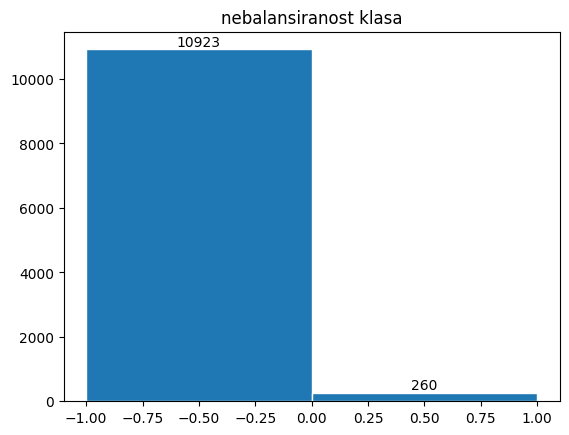

In [209]:
freq, bins, _ = plt.hist(y, edgecolor = 'white', bins = 2)

bin_centers = np.diff(bins) * 0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    fr = int(fr)
    plt.annotate(f'{fr}', xy = (x, fr), xytext = (0, 0.2), textcoords = 'offset points', ha = 'center', va = 'bottom')

plt.title('nebalansiranost klasa')
plt.show()

In [210]:
from sklearn.model_selection  import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 123)

In [212]:
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from termcolor import colored

In [213]:
def report_imbalanced(model, X, y, text = 'training'):
    y_pred = model.predict(X)

    print(colored(f'Classification report for model {type(model).__name__} on {text} data', 'green'))
    print(classification_report_imbalanced(y, y_pred, zero_division = True))

    print(colored(f'Confusion matrix for model {type(model).__name__} on {text} data', 'green'))
    print(pd.DataFrame(confusion_matrix(y, y_pred), index = ['B', 'M'], columns = ['B', 'M']))

    print('-'*100)



In [214]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
dtc = DecisionTreeClassifier(max_depth = 6, min_samples_split = 50, criterion = 'gini')

In [216]:
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [217]:
report_imbalanced(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.63      0.99      0.79      0.65      8192
          1       0.85      0.63      1.00      0.72      0.79      0.61       195

avg / total       0.99      0.99      0.64      0.99      0.79      0.65      8387

Confusion matrix for model DecisionTreeClassifier on training data
      B    M
B  8170   22
M    72  123
----------------------------------------------------------------------------------------------------


In [218]:
report_imbalanced(dtc, X_test, y_test, 'testing')

Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.52      0.99      0.72      0.55      2731
          1       0.72      0.52      1.00      0.61      0.72      0.50        65

avg / total       0.98      0.98      0.53      0.98      0.72      0.54      2796

Confusion matrix for model DecisionTreeClassifier on testing data
      B   M
B  2718  13
M    31  34
----------------------------------------------------------------------------------------------------


In [219]:
dtc1 = DecisionTreeClassifier(max_depth = 6, min_samples_split = 50, criterion = 'gini', class_weight = 'balanced')
dtc1.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [220]:
report_imbalanced(dtc1, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.96      0.94      0.98      0.95      0.91      8192
          1       0.36      0.94      0.96      0.52      0.95      0.90       195

avg / total       0.98      0.96      0.94      0.97      0.95      0.91      8387

Confusion matrix for model DecisionTreeClassifier on training data
      B    M
B  7860  332
M    11  184
----------------------------------------------------------------------------------------------------


In [221]:
report_imbalanced(dtc1, X_test, y_test, 'testing')

Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.75      0.98      0.85      0.74      2731
          1       0.30      0.75      0.96      0.43      0.85      0.71        65

avg / total       0.98      0.95      0.76      0.96      0.85      0.74      2796

Confusion matrix for model DecisionTreeClassifier on testing data
      B    M
B  2618  113
M    16   49
----------------------------------------------------------------------------------------------------


In [222]:
from collections import Counter           # za brojanje instanci po klasama
from sklearn.decomposition import PCA


In [223]:
def resample(sampler, X, y):
    X_resampled, y_resampled = sampler.fit_resample(X, y)      # sempler pravi novi skup podataka
                                       # nauci statistiku + primeni semplovanje

    print(colored(f'Number of instances before resampling with {type(sampler).__name__} : {Counter(y).items()}', "green"))
    print(colored(f'Number of instances after  resampling with {type(sampler).__name__} : {Counter(y_resampled).items()}', "blue"))
    
    return X_resampled, y_resampled

In [224]:
def visualize(X, X_resampled, y, y_resampled, opacity = 0.5):
    pca = PCA(n_components = 2)
    pca.fit(X)

    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled)

    fig = plt.figure(figsize = (20, 5))

    X = [X_pca, X_resampled_pca]
    Y = [y, y_resampled]

    for i in range(2):
        ax = plt.subplot(1, 2, i+1)
        colors = ['b' if y == -1 else 'r' for y in Y[i]]
        alpha = [opacity if y == -1 else 1 - opacity for y in Y[i]]

        plt.scatter(X[i][:, 0], X[i][:, 1], c = colors, alpha = alpha)
        plt.title(f'{'After' if i else 'Before'} resampling', c = 'blue' if i else 'green')
 
    plt.show() 

In [225]:
def train_and_evaluate_model(X_train, y_train, X_test, y_test):

    model = DecisionTreeClassifier(max_depth = 7, min_samples_split = 25, criterion = 'gini')
    model.fit(X_train, y_train)
    
    report_imbalanced(model, X_train, y_train)
    report_imbalanced(model, X_test, y_test, 'testing')
    
    return model

In [226]:
# over-sampling - generisemo nove instance klase koja ima manji broj clanova

# 1. random over sampling - slucajno uzorkobanje manjinske klase sa ponavljanjem

In [227]:
from imblearn.over_sampling import RandomOverSampler

In [228]:
ros = RandomOverSampler(random_state = 0, sampling_strategy = 'minority')
# nedostatak - samo smo povecali broj instanci a nismo dobili nove informacije o manjinskoj klasi

Number of instances before resampling with RandomOverSampler : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with RandomOverSampler : dict_items([(-1, 8192), (1, 8192)])


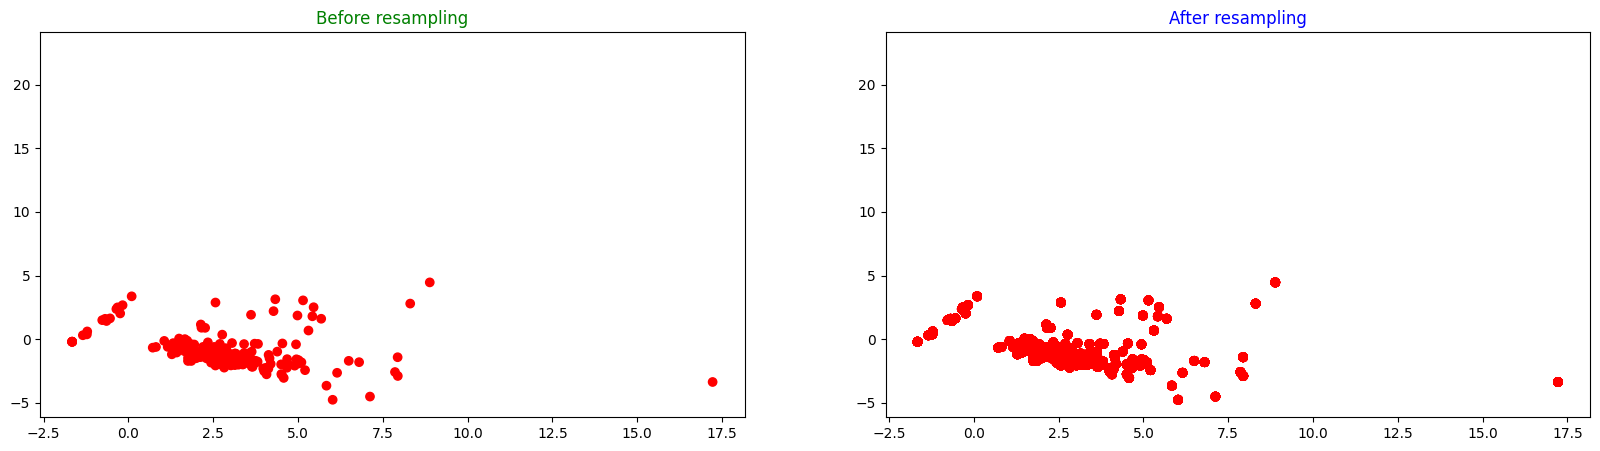

In [229]:
X_resampled, y_resampled = resample(ros, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [230]:
model_ros = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90      8192
          1       0.97      0.93      0.97      0.95      0.95      0.89      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.90     16384

Confusion matrix for model DecisionTreeClassifier on training data
      B     M
B  7926   266
M   593  7599
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.97      0.71      0.98      0.83      0.70      2731
          1       0.35      0.71      0.97      0.47      0.83      0.67        65

avg / total       0.98      0.96      0.71      0.97      0.8

In [231]:
# 2. SMOTE - generise nove uzorke interpolacijom

In [232]:
from imblearn.over_sampling import SMOTE

In [233]:
smote = SMOTE(k_neighbors = 10, random_state = 123)
# dodali smo veliki broj informacija ali imamo potencijalno veliki broj sumova

Number of instances before resampling with SMOTE : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with SMOTE : dict_items([(-1, 8192), (1, 8192)])


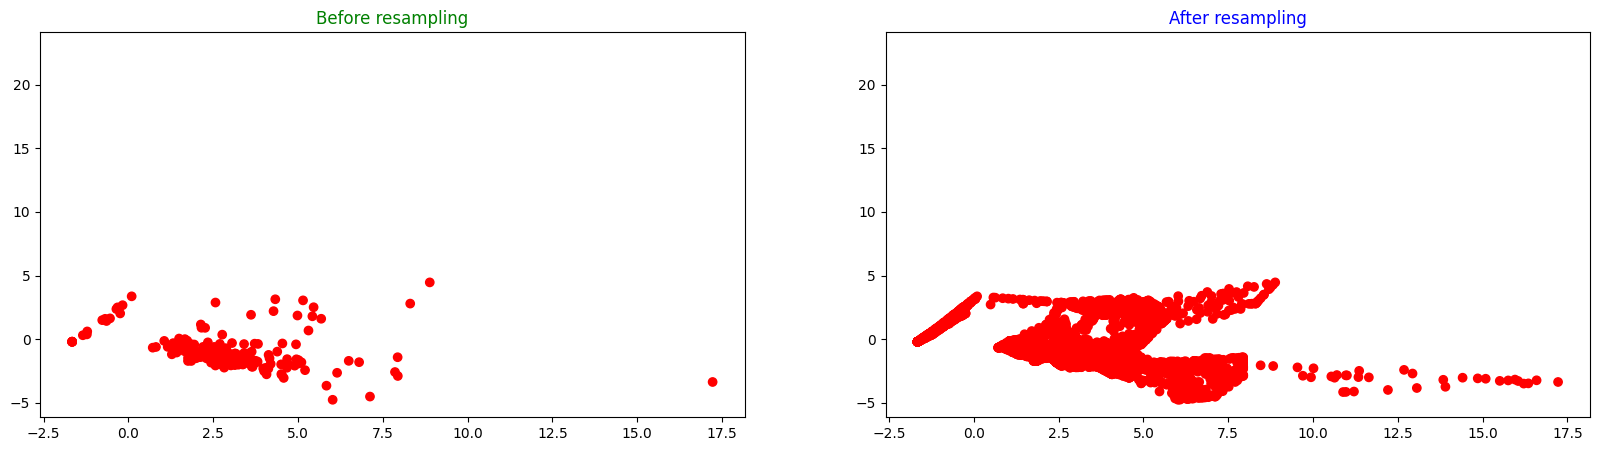

In [234]:
X_resampled, y_resampled = resample(smote, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [235]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.95      0.95      0.95      0.91      8192
          1       0.96      0.95      0.96      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

Confusion matrix for model DecisionTreeClassifier on training data
      B     M
B  7846   346
M   433  7759
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.96      0.75      0.98      0.85      0.74      2731
          1       0.31      0.75      0.96      0.44      0.85      0.71        65

avg / total       0.98      0.95      0.76      0.96      0.8

In [236]:
# under - sampling - uzorkovanjem smanjujemo broj instanci vecinske klase

# 1. random under sampling 

In [237]:
from imblearn.under_sampling import RandomUnderSampler

In [238]:
rus = RandomUnderSampler()

Number of instances before resampling with RandomUnderSampler : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with RandomUnderSampler : dict_items([(-1, 195), (1, 195)])


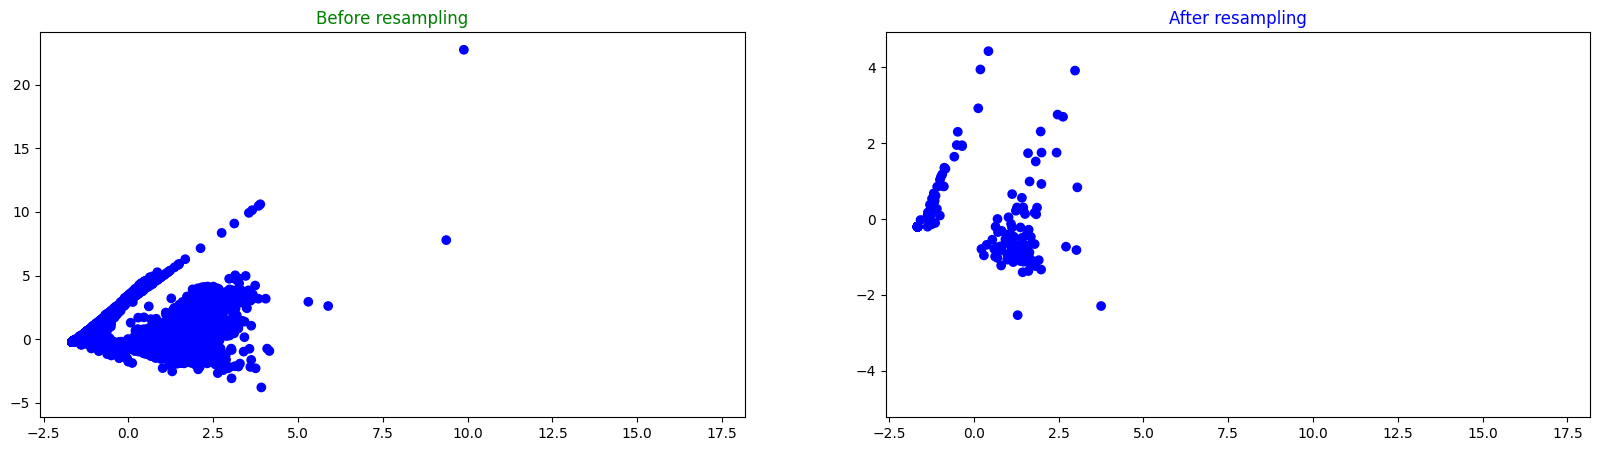

In [239]:
X_resampled, y_resampled = resample(rus, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)

In [240]:
model_rus = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.92      0.90      0.92      0.91      0.91      0.82       195
          1       0.90      0.92      0.90      0.91      0.91      0.83       195

avg / total       0.91      0.91      0.91      0.91      0.91      0.82       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  175   20
M   16  179
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       1.00      0.85      0.86      0.92      0.86      0.73      2731
          1       0.12      0.86      0.85      0.21      0.86      0.73        65

avg / total       0.98      0.85      0.86      0.90      0.86     

In [241]:
# 2. near miss

from imblearn.under_sampling import NearMiss

Number of instances before resampling with RandomUnderSampler : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with RandomUnderSampler : dict_items([(-1, 195), (1, 195)])


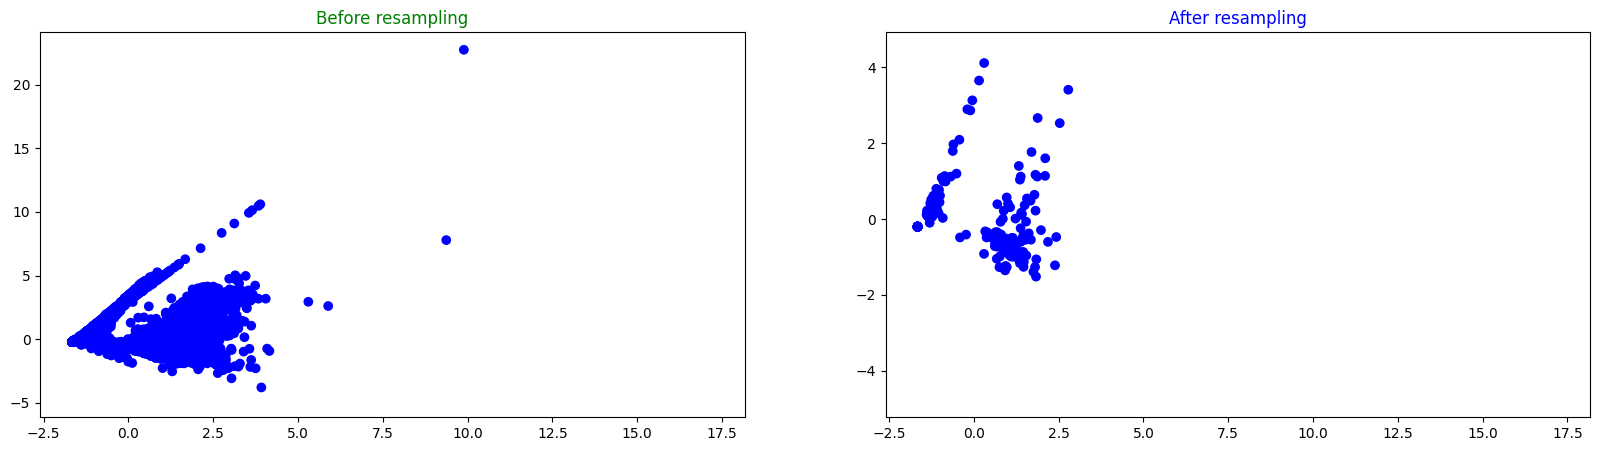

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.88      0.95      0.87      0.92      0.91      0.84       195
          1       0.95      0.87      0.95      0.91      0.91      0.82       195

avg / total       0.92      0.91      0.91      0.91      0.91      0.83       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  186    9
M   25  170
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      0.89      0.80      0.94      0.84      0.72      2731
          1       0.15      0.80      0.89      0.25      0.84      0.70        65

avg / total       0.97      0.89      0.80      0.92      0.84     

In [246]:
nm1 = NearMiss(version = 1, n_neighbors = 20)
X_resampled, y_resampled = resample(rus, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_nm1 = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Number of instances before resampling with NearMiss : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with NearMiss : dict_items([(-1, 195), (1, 195)])


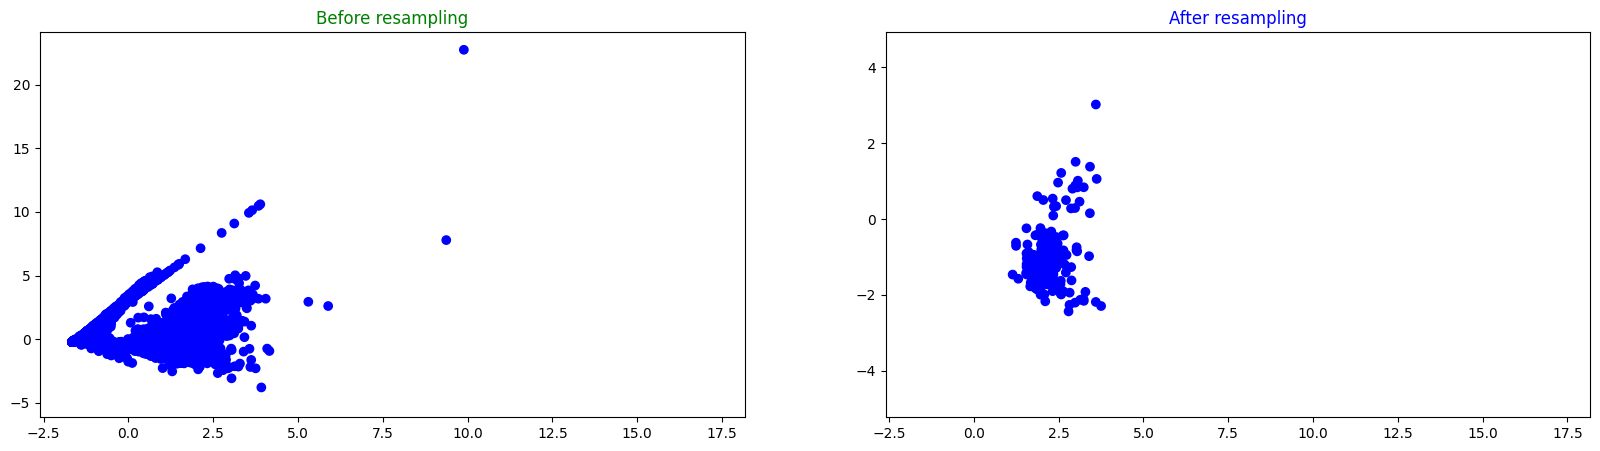

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.97      0.93      0.95      0.95      0.90       195
          1       0.97      0.93      0.97      0.95      0.95      0.90       195

avg / total       0.95      0.95      0.95      0.95      0.95      0.90       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  189    6
M   14  181
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.93      0.03      0.89      0.07      0.17      0.03      2731
          1       0.02      0.89      0.03      0.04      0.17      0.03        65

avg / total       0.91      0.05      0.87      0.07      0.17     

In [247]:
nm2 = NearMiss(version = 2, n_neighbors = 20)
X_resampled, y_resampled = resample(nm2, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_nm2 = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Number of instances before resampling with NearMiss : dict_items([(-1, 8192), (1, 195)])
Number of instances after  resampling with NearMiss : dict_items([(-1, 195), (1, 195)])


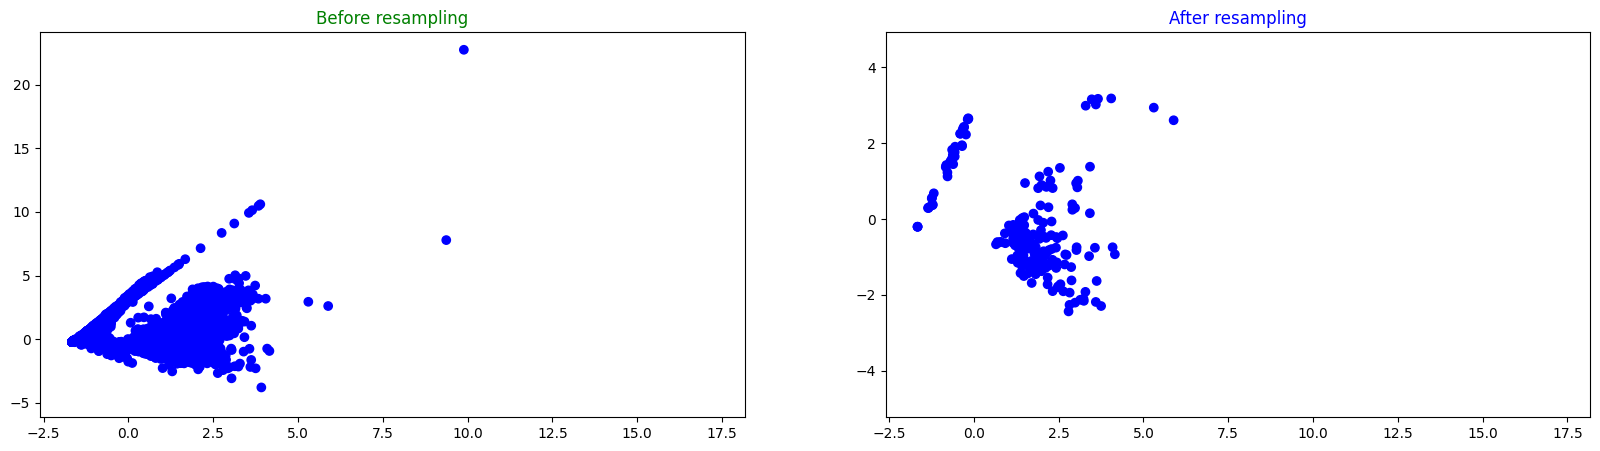

Classification report for model DecisionTreeClassifier on training data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.78      0.94      0.73      0.85      0.83      0.70       195
          1       0.92      0.73      0.94      0.81      0.83      0.67       195

avg / total       0.85      0.83      0.83      0.83      0.83      0.68       390

Confusion matrix for model DecisionTreeClassifier on training data
     B    M
B  183   12
M   53  142
----------------------------------------------------------------------------------------------------
Classification report for model DecisionTreeClassifier on testing data
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.98      0.59      0.62      0.74      0.60      0.36      2731
          1       0.03      0.62      0.59      0.07      0.60      0.36        65

avg / total       0.96      0.59      0.61      0.72      0.60     

In [248]:
nm3 = NearMiss(version = 3, n_neighbors = 20)
X_resampled, y_resampled = resample(nm3, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled, 1)
model_nm3 = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

In [249]:
# condense nearest neighbors